# Self-Driving Car ND : P3 - Behavioural Cloning 

## The below code building two different ConvNet to predict steering angle based on camera inputs. The first is a ConvNet based on LeNet architecture and the second is based on the NVIDIA model for autonomous driving. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Prepare the data

In [2]:
def process_image(filepath): 
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image 

In [3]:
import csv 
import cv2 
import numpy as np

paths = ['data/', 'data2/', 'data3/']
filenames = [] 
measurements = [] 
for path in paths: 
    image_path = path + 'IMG/'
    ids = []
    with open(path + 'driving_log.csv') as csvfile: 
        reader = csv.reader(csvfile)
        for line in reader: 

            correction = 0.25 
            steering = line[3]
            measurement = float(steering)
            center_img = line[0].split('/')[-1]
            left_img = line[1].split('/')[-1]
            right_img = line[2].split('/')[-1]

            filenames.extend([image_path + center_img, image_path + left_img, image_path + right_img])
            measurements.extend([measurement, -(measurement + correction), -(measurement - correction)])

x = np.array(range(0, len(filenames)))
y = np.array(measurements)

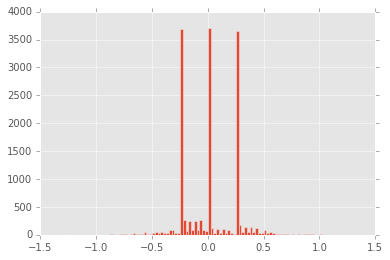

In [4]:
plt.hist(y, bins=100)
plt.show()

In [5]:
def balanced_subsample(x,y,size):

    class_xs = []

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        num = len(this_xs) 
        if num > size:
            np.random.shuffle(this_xs)
            x_ = this_xs[:size]
            y_ = np.empty(size)
            y_.fill(ci)
        else: 
            x_ = this_xs[:]
            y_ = np.empty(num)
            y_.fill(ci)
            
        xs.append(x_)
        ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

In [6]:
x_sample,y_sample = balanced_subsample(x,y, size=75)

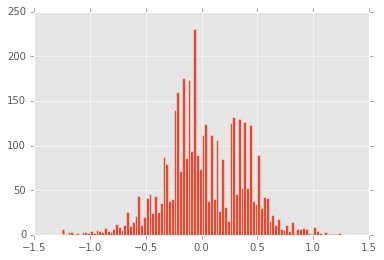

In [11]:
plt.hist(y_sample, bins=100)
plt.show()

In [12]:
x = []
y = []

for xi, yi in zip(x_sample,y_sample): 
    filepath = filenames[xi]
    image = process_image(filepath)
    x.append(image)
    y.append(yi)
    image_flipped = np.fliplr(image)
    yi_flipped = -yi
    x.append(image_flipped)
    y.append(yi_flipped)

x = np.array(x)
y = np.array(y)

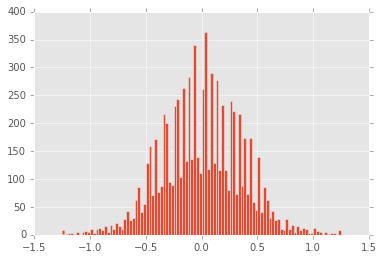

In [14]:
plt.hist(y, bins=100)
plt.show()

In [ ]:
import csv 
import cv2 
import numpy as np

#data: 2 Laps of Track 1
path = 'data/IMG/'
images = [] 
measurements = [] 
with open('data/driving_log.csv') as csvfile: 
    reader = csv.reader(csvfile)
    for line in reader: 

        correction = 0.25 #Tuning TBD
        steering = line[3]
        measurement = float(steering)
        
        # Center Image 
        filename = line[0].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement)
        image_flipped = np.fliplr(image)
        measurement_flipped = -measurement
        images.append(image_flipped)
        measurements.append(measurement_flipped)

        # Left Image 
        filename = line[1].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement + correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement + correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)        
        
        # Right Image 
        filename = line[2].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement - correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement - correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)                
        
# More data : Track 2 
path = 'data2/IMG/'
with open('data2/driving_log.csv') as csvfile: 
    reader = csv.reader(csvfile)
    for line in reader: 

        correction = 0.25 #Tuning TBD
        steering = line[3]
        measurement = float(steering)
        
        # Center Image 
        filename = line[0].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement)
        image_flipped = np.fliplr(image)
        measurement_flipped = -measurement
        images.append(image_flipped)
        measurements.append(measurement_flipped)

        # Left Image 
        filename = line[1].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement + correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement + correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)        
        
        # Right Image 
        filename = line[2].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement - correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement - correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)                

        
# More data : Track 
path = 'data3/IMG/'
with open('data3/driving_log.csv') as csvfile: 
    reader = csv.reader(csvfile)
    for line in reader: 

        correction = 0.25 #Tuning TBD
        steering = line[3]
        measurement = float(steering)
        
        # Center Image 
        filename = line[0].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement)
        image_flipped = np.fliplr(image)
        measurement_flipped = -measurement
        images.append(image_flipped)
        measurements.append(measurement_flipped)

        # Left Image 
        filename = line[1].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement + correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement + correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)        
        
        # Right Image 
        filename = line[2].split('/')[-1]
        image = cv2.imread(path + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        measurements.append(measurement - correction)
        image_flipped = np.fliplr(image)
        measurement_flipped = -(measurement - correction) 
        images.append(image_flipped)
        measurements.append(measurement_flipped)                

X = np.array(images)
y = np.array(measurements)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

plt.hist(y, bins=100)
plt.show()

In [ ]:
sX, sy = balanced_subsample(X,y)

In [ ]:
subsample = []

if size is None:
    n_smp = y.value_counts().min()
else:
    n_smp = int(size / len(y.value_counts().index))

for label in y.value_counts().index:
    samples = y[y == label].index.values
    index_range = range(samples.shape[0])
    indexes = np.random.choice(index_range, size=n_smp, replace=False)
    subsample += samples[indexes].tolist()

return subsample

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, Cropping2D

img_rows, img_cols, img_chls = X[1].shape

### LeNet Architecture

In [ ]:
# keep_prob = 0.2
# batch_size = 128 
# epochs = 5

# model = Sequential()
# model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=X.shape[1:]))
# model.add(Cropping2D(cropping=((70,25), (0,0))))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(keep_prob))
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Dropout(keep_prob))
# model.add(Dense(80))
# model.add(Dropout(keep_prob))
# model.add(Dense(1))

# model.compile(loss='mse',
#               optimizer='adam'
#              )

# model.fit(X, y,
#           batch_size=batch_size,
#           validation_split = 0.2,
#           epochs=epochs,
#           verbose=1, 
#           shuffle=True
#          )
          
# model.save('model_lenet.h5')

### NVIDIA Architecture

In [ ]:
keep_prob = 0.4
batch_size = 64 
epochs = 4

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=X.shape[1:]))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Conv2D(24, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(36, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(48, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(keep_prob))
model.add(Dense(64))
model.add(Dropout(keep_prob))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam'
             )

history_object = model.fit(X, y,
          batch_size=batch_size,
          validation_split = 0.2,
          epochs=epochs,
          verbose=1, 
          shuffle=True
         )

model.save('model_nvidia.h5')

In [ ]:
from keras.models import Model

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()